# <span style="color:blue"> Tutorial 5 Question 4</span>
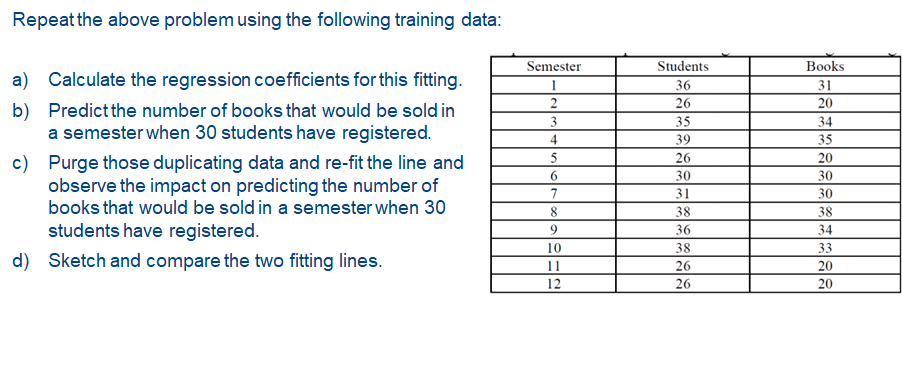

w is
[[-10.41257051]
 [  1.21434327]]
[[26.01772764]]
cleaned data = 
[[26 20]
 [30 30]
 [31 30]
 [35 34]
 [36 31]
 [36 34]
 [38 33]
 [38 38]
 [39 35]]
[[ 1. 26.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 35.]
 [ 1. 36.]
 [ 1. 36.]
 [ 1. 38.]
 [ 1. 38.]
 [ 1. 39.]]
[[-3.55844156]
 [ 1.02597403]]


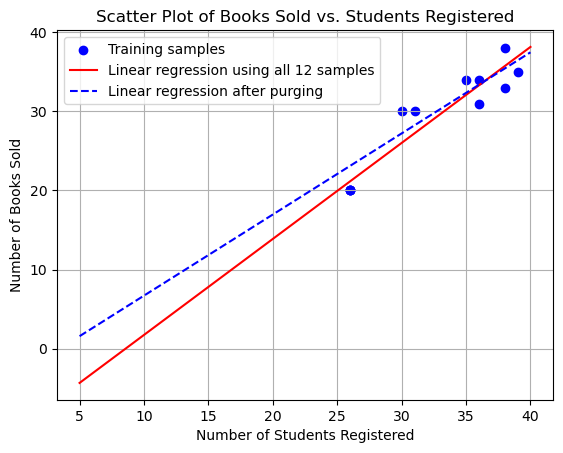

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.linalg import inv

# Define Data: Number of students (X) and number of books sold (y)
X = np.array([36, 26, 35, 39, 26, 30, 31, 38, 36, 38, 26, 26])
X = X.reshape(-1, 1) # reshape as a vertical vector 
y = np.array([31, 20, 34, 35, 20, 30, 30, 38, 34, 33, 20, 20])
y = y.reshape(-1, 1) # reshape as a vertical vector
b   = np.ones( (len(X), 1) )
X_b = np.hstack((b, X)) # add bias to the X matrix

# Scatter plot
plt.scatter(X, y, color='blue', label='Training samples')
plt.title('Scatter Plot of Books Sold vs. Students Registered')
plt.xlabel('Number of Students Registered')
plt.ylabel('Number of Books Sold')
plt.grid(True)
plt.legend()

# (a) Linear Regression: Calculate w
w = inv(X_b.T@X_b)@X_b.T@y
print("w is"); print(w)

# draw the estimated line
X_t = np.linspace(5,40, 50)
X_t = X_t.reshape(-1, 1)
b_t = np.ones((len(X_t),1)) # generate a bias column vector
X_b_t = np.hstack((b_t, X_t))
y_t = X_b_t@w
plt.plot(X_t, y_t, color='red', label='Linear regression using all 12 samples')

# (b) Predict books sold when 30 students are registered
X_new_30 = 30
y_pred_30 = np.array([ [1, X_new_30]]) @ w
print(y_pred_30)

# (c) Purge duplicates (keep only one instance where X = 26 and Y = 20)
# X_cleaned = np.array([36, 35, 39, 30, 31, 38, 36, 38, 26])
# X_cleaned = X_cleaned.reshape(-1,1)
# y_cleaned = np.array([31, 34, 35, 30, 30, 38, 34, 33, 20])
# y_cleaned = y_cleaned.reshape(-1,1)

# find the unique data
duplicated = np.hstack((X,y))
cleaned = np.unique(duplicated , axis=0)
print("cleaned data = ")
print(cleaned)
X_cleaned = cleaned[:,0]
X_cleaned = X_cleaned.reshape(-1,1)
y_cleaned = cleaned[:,1]
y_cleaned = y_cleaned.reshape(-1,1)

b_cleaned   = np.ones( (len(X_cleaned), 1) )
X_b_cleaned = np.hstack((b_cleaned, X_cleaned)) # add bias to the X matrix
print(X_b_cleaned)

w_cleaned = inv(X_b_cleaned.T@X_b_cleaned)@X_b_cleaned.T@y_cleaned
print(w_cleaned)

# (d) Sketch and compare the two fitting lines
y_t_cleaned = X_b_t@w_cleaned
plt.plot(X_t, y_t_cleaned, color='blue', linestyle='--', label='Linear regression after purging')
plt.legend()
plt.show()